# Analysis of the KMeans method and various ways to found an optimal number of clusters

## Import libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Data
Exploratory on the dataset used in this analysis

In [2]:
df = spark.read.parquet("../../../data/clustering/")
print("Nb of points: {0} \n".format(df.count()))
print("Schema of the dataset:")
df.printSchema()
print("\n View of few lines:")
df.show(5)

Nb of points: 1600 

Schema of the dataset:
root
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)


 View of few lines:
+------------------+-------------------+
|                 x|                  y|
+------------------+-------------------+
|-9.536089612616399|-11.045375075619603|
|-10.47557735273648| -9.708859318016877|
| -8.45711895678184|  -9.42398720049261|
| -9.61345564720809| -10.34863203150554|
|-9.675085532529978|-10.757201027930972|
+------------------+-------------------+
only showing top 5 rows



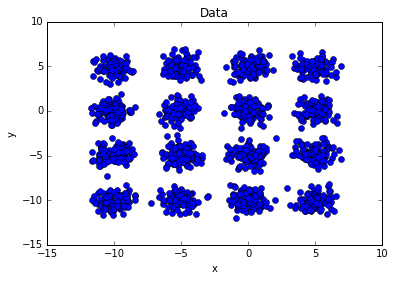

In [3]:
points = df.rdd.map(lambda p: (p["x"], p["y"])).collect()
fig, ax = plt.subplots();
ax.plot(map(lambda x: x[0], points), map(lambda x: x[1], points), 'o');
ax.set_title("Data");
ax.set_xlabel("x");
ax.set_ylabel("y");
fig.savefig("../../../figure/clustering/dataset.png")

## Elbow method

In [4]:
data = (spark.read.parquet("../../../target/data/elbowcost")
        .rdd
        .map(lambda x: (x["k"], x["cost"]))
        .collect())
data.sort(key = lambda x: x[0])

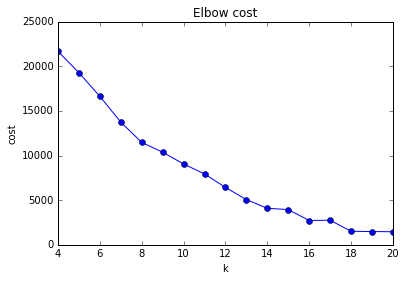

In [5]:
fig, ax = plt.subplots();
ax.plot(map(lambda x: x[0], data), map(lambda x: x[1], data), 'o-');
ax.set_title("Elbow cost");
ax.set_xlabel("k");
ax.set_ylabel("cost");
fig.savefig("../../../figure/clustering/elbowIntuitive.png")

## Train validation - Elbow method

In [6]:
data_training = (spark
                 .read
                 .parquet("../../../target/data/trainvalidation/trainingCost/").rdd
                 .map(lambda x: (x["k"], x["cost"]))
                 .collect())
data_training.sort(key = lambda x: x[0])

data_validation = (spark
                 .read
                 .parquet("../../../target/data/trainvalidation/validationCost/").rdd
                 .map(lambda x: (x["k"], x["cost"]))
                 .collect())
data_validation.sort(key = lambda x: x[0])

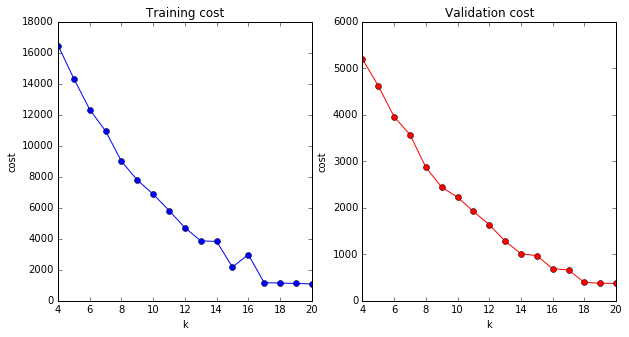

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,5));
ax[0].plot(map(lambda x: x[0], data_training), map(lambda x: x[1], data_training), "bo-", label="training");
ax[1].plot(map(lambda x: x[0], data_validation), map(lambda x: x[1], data_validation), "ro-", label="validation");
ax[0].set_title("Training cost");
ax[0].set_xlabel("k");
ax[0].set_ylabel("cost");
ax[1].set_title("Validation cost");
ax[1].set_xlabel("k");
ax[1].set_ylabel("cost");
fig.savefig("../../../figure/clustering/elbowTrainValidation.png")

## Cross-validation - Elbow method

In [8]:
data_training = (spark
                 .read
                 .parquet("../../../target/data/crossvalidation/trainingCost/").rdd
                 .map(lambda x: (x["k"], x["cost"]))
                 .collect())
data_training.sort(key = lambda x: x[0])

data_validation = (spark
                 .read
                 .parquet("../../../target/data/crossvalidation/validationCost/").rdd
                 .map(lambda x: (x["k"], x["cost"]))
                 .collect())
data_validation.sort(key = lambda x: x[0])

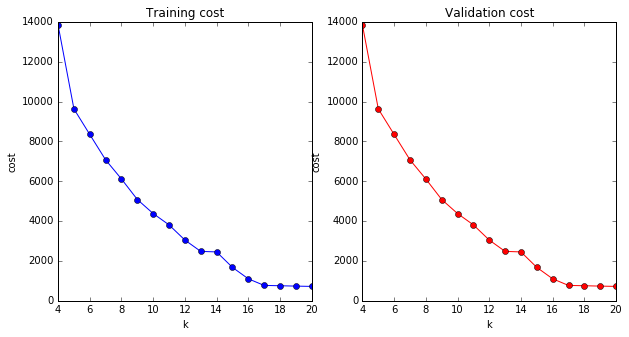

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,5));
ax[0].plot(map(lambda x: x[0], data_training), map(lambda x: x[1], data_training), "bo-", label="training");
ax[1].plot(map(lambda x: x[0], data_validation), map(lambda x: x[1], data_validation), "ro-", label="validation");
ax[0].set_title("Training cost");
ax[0].set_xlabel("k");
ax[0].set_ylabel("cost");
ax[1].set_title("Validation cost");
ax[1].set_xlabel("k");
ax[1].set_ylabel("cost");
fig.savefig("../../../figure/clustering/elbowCrossValidation.png")

## Explained variance

In [10]:
data = (spark
        .read
        .parquet("../../../target/data/explainedVariance/").rdd
        .map(lambda x: (x["k"], x["explained_variance"]))
        .collect())
data.sort(key = lambda x: x[0])

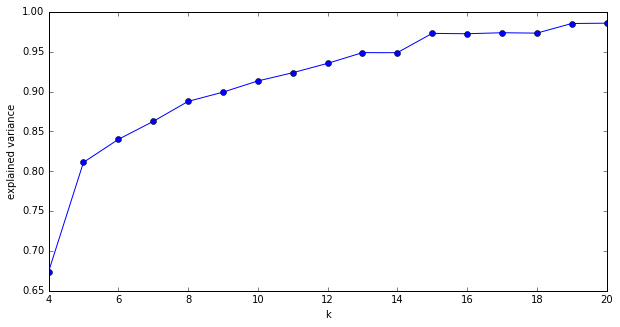

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,5));
ax.plot(map(lambda x: x[0], data), map(lambda x: x[1], data), "bo-");
ax.set_xlabel("k");
ax.set_ylabel("explained variance");
fig.savefig("../../../figure/clustering/explainedVariance.png")

## ch index

In [12]:
data = (spark
        .read
        .parquet("../../../target/data/chIndex").rdd
        .map(lambda x: (x["k"], x["ch_index"]))
        .collect())
data.sort(key = lambda x: x[0])

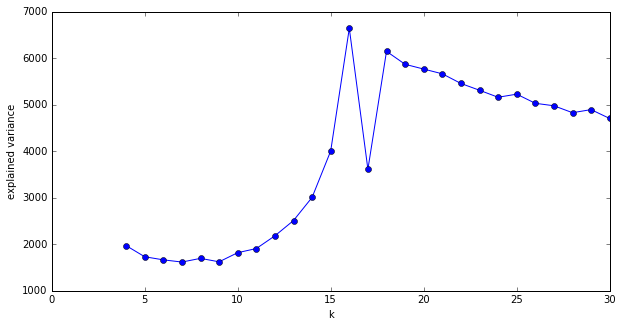

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,5));
ax.plot(map(lambda x: x[0], data), map(lambda x: x[1], data), "bo-");
ax.set_xlabel("k");
ax.set_ylabel("explained variance");
fig.savefig("../../../figure/clustering/chIndex.png")

In [14]:
data

[(4, 1971.9129432199854),
 (5, 1732.2639494718437),
 (6, 1665.5832859269617),
 (7, 1618.3734872119257),
 (8, 1697.4255444125508),
 (9, 1623.2827932421108),
 (10, 1819.7862577615704),
 (11, 1908.4113346277506),
 (12, 2182.336125498661),
 (13, 2510.87370566777),
 (14, 3009.2553122184295),
 (15, 4006.1791965243538),
 (16, 6643.670641233697),
 (17, 3613.403967681439),
 (18, 6149.827536971546),
 (19, 5870.904139269478),
 (20, 5768.30820939243),
 (21, 5666.445308942595),
 (22, 5459.155824221902),
 (23, 5312.71048380169),
 (24, 5162.128991604242),
 (25, 5228.908133918793),
 (26, 5032.4063223608155),
 (27, 4979.148850666104),
 (28, 4830.249421255079),
 (29, 4896.242771128776),
 (30, 4705.5325277402735)]